In [2]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
from sklearn.cluster import KMeans

In [3]:
df = pd.read_csv(r'D:\Gaurav\kmeans\Mall_Customers.csv')

In [4]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [6]:
df.shape

(200, 5)

In [7]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [16]:
# we will select 2 columns for our future use as an x-axis and y-axis for modelling, x-> income, y-> spending
#we will select values of annual income and spending score in an array.
##The .loc[] method is a label based method that means it takes names or labels of the index when taking the slices, 
#whereas .iloc[] method is based on the index's position.
X = df.iloc[:,[3,4]].values

In [17]:
X

array([[ 15,  39],
       [ 15,  81],
       [ 16,   6],
       [ 16,  77],
       [ 17,  40],
       [ 17,  76],
       [ 18,   6],
       [ 18,  94],
       [ 19,   3],
       [ 19,  72],
       [ 19,  14],
       [ 19,  99],
       [ 20,  15],
       [ 20,  77],
       [ 20,  13],
       [ 20,  79],
       [ 21,  35],
       [ 21,  66],
       [ 23,  29],
       [ 23,  98],
       [ 24,  35],
       [ 24,  73],
       [ 25,   5],
       [ 25,  73],
       [ 28,  14],
       [ 28,  82],
       [ 28,  32],
       [ 28,  61],
       [ 29,  31],
       [ 29,  87],
       [ 30,   4],
       [ 30,  73],
       [ 33,   4],
       [ 33,  92],
       [ 33,  14],
       [ 33,  81],
       [ 34,  17],
       [ 34,  73],
       [ 37,  26],
       [ 37,  75],
       [ 38,  35],
       [ 38,  92],
       [ 39,  36],
       [ 39,  61],
       [ 39,  28],
       [ 39,  65],
       [ 40,  55],
       [ 40,  47],
       [ 40,  42],
       [ 40,  42],
       [ 42,  52],
       [ 42,  60],
       [ 43,

In [18]:
#Now we will choose the number of clusters
# using elbow method , and we will use the formula 
#WCSS  -> within cluster sum of squares 

In [23]:
wcss=[]

for i in range(2,7):
    kmeans = KMeans(n_clusters=i,init = "k-means++",random_state=15)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

Text(0, 0.5, 'WCSS')

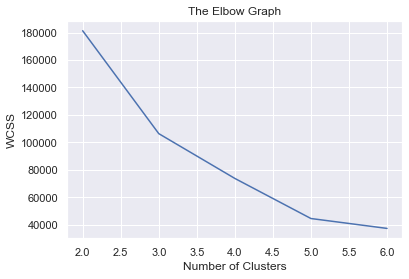

In [24]:
#Now we will plot the elbow graph
sns.set()
plt.plot(range(2,7),wcss)
plt.title('The Elbow Graph')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')

In [25]:
#Now by watching the elbow graoh we can see that in this elbow graph there are 2 drops 
# i.e. at 3 and 5 
# so after 5 there is no significant drop so we will 
#                               "select 5 as an optimum number of clusters"

In [26]:
# Now we will train our model 

In [29]:
kmeans = KMeans(n_clusters=5, random_state=0, init = 'k-means++')
Y = kmeans.fit_predict(X)
print(Y)

[4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4
 3 4 3 4 3 4 1 4 3 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 2 0 2 1 2 0 2 0 2 1 2 0 2 0 2 0 2 0 2 1 2 0 2 0 2
 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0
 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2]


In [ ]:
#  NOW WE GOT 5 CLUESTERS WHICH ARE : 0,1,2,3,4

In [30]:
# now cluster formation is done 
# the next step is to visualize the clusters

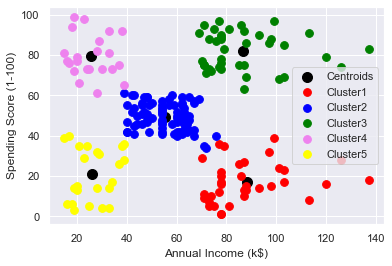

In [38]:
'''
plt.scatter( kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 100, c = 'black', label = 'Centroids')
plt.scatter( X[Y == 0, 0], X[Y == 0, 1], s = 60, c = 'red', label = 'Cluster1')
plt.scatter( X[Y == 1, 0], X[Y == 1, 1], s = 60, c = 'blue', label = 'Cluster2') 
plt.scatter( X[Y == 2, 0], X[Y == 2, 1], s = 60, c = 'green', label = 'Cluster3') 
plt.scatter( X[Y == 3, 0], X[Y == 3, 1], s = 60, c = 'violet', label = 'Cluster4') 
plt.scatter( X[Y == 4, 0], X[Y == 4, 1], s = 60, c = 'yellow', label = 'Cluster5') 
plt.xlabel('Annual Income (k$)') 
plt.ylabel('Spending Score (1-100)') 
plt.legend() 

plt.show()
'''

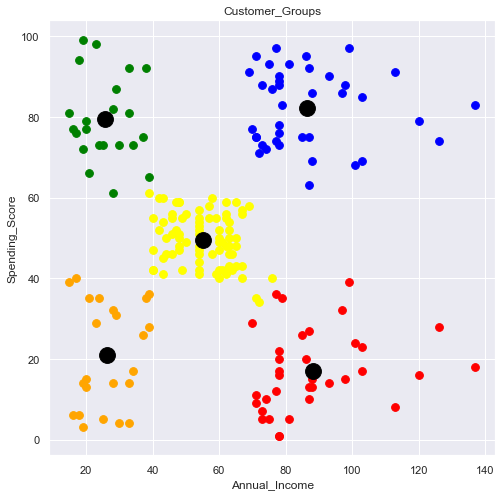

In [63]:
# X[Y == 0, 0] -> here first 0 represent cluster and second 0 represent X coordinate with respect to salary and spending
plt.figure(figsize=(8,8))
plt.scatter(X[Y == 0, 0], X[Y == 0, 1], s = 60, c = 'red', label = 'Cluster 1')
plt.scatter(X[Y == 1, 0], X[Y == 1, 1], s = 60, c = 'yellow', label = 'Cluster 2')
plt.scatter(X[Y == 2, 0], X[Y == 2, 1], s = 60, c = 'blue', label = 'Cluster 3')
plt.scatter(X[Y == 3, 0], X[Y == 3, 1], s = 60, c = 'green', label = 'Cluster 4')
plt.scatter(X[Y == 4, 0], X[Y == 4, 1], s = 60, c = 'orange', label = 'Cluster 5')
# LET US PLOT THE CENTROIDS
plt.scatter(kmeans.cluster_centers_[:,0] , kmeans.cluster_centers_[:,1] , s=250, c='black', label = 'CENTROID')
# Marking of graph
plt.title('Customer_Groups')
plt.xlabel('Annual_Income')
plt.ylabel('Spending_Score')
plt.show()